In [1]:
# Data Validation
# necesarry libraries have been imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# read the dataset 
asteroids_df = pd.read_csv('NASA Near-Earth Objects.csv')
asteroids_df.head()

,Unnamed: 0,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


In [3]:
# checking for missing data

asteroids_df.isna().sum()

Unnamed: 0                               0
id                                       0
neo_reference_id                         0
name                                     0
name_limited                         23856
designation                              0
absolute_magnitude_h                     8
is_potentially_hazardous_asteroid        0
is_sentry_object                         0
kilometers_estimated_diameter_min        8
kilometers_estimated_diameter_max        8
orbit_id                                 0
orbit_class_type                         0
perihelion_distance                      0
aphelion_distance                        0
first_observation_date                   0
last_observation_date                    0
orbit_class_description                  0
dtype: int64

In [4]:
# cleaning up the missing data (delete the name column)

asteroids_df = asteroids_df.drop('name_limited', axis = 1)


In [5]:
#using the desribe method on the numeric columns
numeric = ['absolute_magnitude_h', 'kilometers_estimated_diameter_min',
           'kilometers_estimated_diameter_max', 'perihelion_distance', 'aphelion_distance']
asteroids_df[numeric].describe()

,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
count,23992.000000,23992.000000,23992.000000,24000.000000,24000.000000
mean,22.942274,0.167777,0.375160,0.915225,2.653104
std,2.952871,0.293000,0.655169,0.232201,4.468233
min,12.580000,0.000609,0.001362,0.070431,0.653754
25%,20.650000,0.024241,0.054205,0.785150,1.706281
50%,23.200000,0.060891,0.136157,0.965325,2.480109
75%,25.200000,0.197040,0.440595,1.068984,3.397965
max,33.200000,8.101305,18.115068,1.299988,631.895456


In [6]:
# remove the outliers
asteroids_df = asteroids_df[asteroids_df['aphelion_distance'] < 100]

In [37]:
# modify the class description column to be easier to read

mapping = {'Near-Earth asteroid orbits which cross the Earth’s orbit similar to that of 1862 Apollo':'NE asteroid like 1862 Apollo',
          'Near-Earth asteroid orbits similar to that of 1221 Amor' : 'NE asteroid like 1221 Amor',
          'Near-Earth asteroid orbits similar to that of 2062 Aten' : 'NE asteroid like 2062 Aten',
          'An asteroid orbit contained entirely within the orbit of the Earth - Interior Earth Object': 'Interior Earth Object'}
asteroids_df['orbit_class_description'] = asteroids_df['orbit_class_description'].replace(mapping)

In [38]:
#using value counts  method  on categorical colummns
categorical = ['orbit_class_type', 'orbit_class_description','is_potentially_hazardous_asteroid', 'is_sentry_object']
asteroids_df[categorical].value_counts()

orbit_class_type  orbit_class_description       is_potentially_hazardous_asteroid  is_sentry_object
APO               NE asteroid like 1862 Apollo  False                              False               10528
AMO               NE asteroid like 1221 Amor    False                              False                8780
APO               NE asteroid like 1862 Apollo  True                               False                1784
ATE               NE asteroid like 2062 Aten    False                              False                1524
APO               NE asteroid like 1862 Apollo  False                              True                  922
ATE               NE asteroid like 2062 Aten    True                               False                 175
AMO               NE asteroid like 1221 Amor    True                               False                 118
ATE               NE asteroid like 2062 Aten    False                              True                  113
AMO               NE asteroi

In [9]:
# impute the missing values in absolute magnitude column

asteroids = asteroids_df[~np.isnan(asteroids_df['kilometers_estimated_diameter_min'])]
asteroids['absolute_magnitude_h'].fillna(asteroids['absolute_magnitude_h'].mean(), inplace = True)
asteroids.isna().sum()

Unnamed: 0                           0
id                                   0
neo_reference_id                     0
name                                 0
designation                          0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
orbit_id                             0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               0
last_observation_date                0
orbit_class_description              0
dtype: int64

In [10]:
#Convert categorical variables into indicator variables

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for  i in categorical:
    asteroids[i]  = encoder.fit_transform(asteroids[i])

asteroids.head()

,Unnamed: 0,id,neo_reference_id,name,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,0,2001981,2001981,1981 Midas (1973 EA),1981,15.22,1,0,2.401900,5.370812,229,1,0.621512,2.931360,1973-03-06,2021-10-20,2
1,1,2002059,2002059,2059 Baboquivari (1963 UA),2059,15.97,0,0,1.700415,3.802244,268,0,1.238537,4.047945,1963-10-16,2021-04-15,1
2,2,2002061,2002061,2061 Anza (1960 UA),2061,16.36,0,0,1.420872,3.177167,180,0,1.050403,3.478155,1960-10-22,2021-06-12,1
3,3,2002062,2002062,2062 Aten (1976 AA),2062,17.10,0,0,1.010543,2.259644,149,2,0.790185,1.143633,1955-12-17,2019-11-10,3
4,4,2002063,2002063,2063 Bacchus (1977 HB),2063,17.28,0,0,0.930154,2.079888,143,1,0.701397,1.454804,1977-04-24,2021-12-02,2


In [11]:
#check for duplicates (no duplicates identified)
asteroids[asteroids.duplicated(subset = 'name')]

,Unnamed: 0,id,neo_reference_id,name,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description


In [12]:
# display the largest 10 asteroids
asteroids[['name', 'kilometers_estimated_diameter_max']].sort_values(
    by = 'kilometers_estimated_diameter_max',ascending = False).head(10)


,name,kilometers_estimated_diameter_max
60,4954 Eric (1990 SQ),18.115068
28,3552 Don Quixote (1983 SA),14.455728
11,2212 Hephaistos (1978 SB),11.696071
208,25916 (2001 CP44),10.520587
71,5587 (1990 SB),10.233872
190,20826 (2000 UV13),10.140047
97,6455 (1992 HE),9.333402
18,3122 Florence (1981 ET3),9.247833
43,4183 Cuno (1959 LM),8.872377
64,5143 Heracles (1991 VL),8.872377


In [13]:
# display the oldest 10 asteroids
asteroids[['name', 'first_observation_date']].sort_values(by = 'first_observation_date', ascending = True).head(10)

,name,first_observation_date
9,2201 Oljato (1947 XC),1931-12-03
42,4179 Toutatis (1989 AC),1934-02-10
229,34613 (2000 UR13),1934-03-16
6,2101 Adonis (1936 CA),1936-02-21
48,4450 Pan (1987 SY),1937-02-06
317,69230 Hermes (1937 UB),1937-10-25
147,11054 (1991 FA),1937-11-28
39,4015 Wilson-Harrington (1979 VA),1949-11-19
218,29075 (1950 DA),1950-02-23
1394,355770 (2008 RE80),1950-05-19


In [14]:
# convert first and  last observation date into dates and extract the year
from datetime import datetime
asteroids['first_observation_date'] = asteroids['first_observation_date'].str.replace('??-??', '01-01', regex=False)



In [15]:
asteroids['first_observation_year'] = pd.to_datetime(asteroids['first_observation_date']).apply(lambda x: x.year)
asteroids['last_observation_year'] = pd.to_datetime(asteroids['last_observation_date']).apply(lambda x: x.year)
asteroids.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23989 entries, 0 to 23999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         23989 non-null  int64  
 1   id                                 23989 non-null  int64  
 2   neo_reference_id                   23989 non-null  int64  
 3   name                               23989 non-null  object 
 4   designation                        23989 non-null  object 
 5   absolute_magnitude_h               23989 non-null  float64
 6   is_potentially_hazardous_asteroid  23989 non-null  int64  
 7   is_sentry_object                   23989 non-null  int64  
 8   kilometers_estimated_diameter_min  23989 non-null  float64
 9   kilometers_estimated_diameter_max  23989 non-null  float64
 10  orbit_id                           23989 non-null  object 
 11  orbit_class_type                   23989 non-null  int

In [16]:
# create an interaction  for first observation date

import ipywidgets as widgets
from ipywidgets import interact_manual

pd.set_option('max_rows', 40)
@interact_manual(year = (1931, 2020))
def show_first_observation_year(column = ['first_observation_year'], year = 1980):
    interact = asteroids.loc[asteroids[column] < year][['name', 'absolute_magnitude_h','kilometers_estimated_diameter_max','kilometers_estimated_diameter_min']]
    return interact

interactive(children=(Dropdown(description='column', options=('first_observation_year',), value='first_observa…

In [17]:
#calculate proportions of the discovered asteroids per decades

asteroids['decade'] = np.floor(asteroids['first_observation_year']/10).astype('int')
def comp(x):
    if x <= 196:
        return 'before 196'
    else:
        return x
    
asteroids['decade'] = asteroids['decade'].apply(comp)
proportions = asteroids['decade'].value_counts()/len(asteroids['decade'])


([<matplotlib.patches.Wedge at 0x1f1d5ccd9a0>,
 [Text(-1.1194052539276347, -0.4323561928308744, '201'),
  Text(1.1963527037474968, -0.0934890808386449, '200'),
  Text(0.6956706920064624, 0.9777741499360932, '202'),
  Text(0.27261436677941464, 1.1686237234565535, '199'),
  Text(0.10186877715440251, 1.1956683286936503, '198'),
  Text(0.05174171665990164, 1.2989698975561699, '197'),
  Text(0.015832745043227604, 1.2999035826492658, 'before 196')])

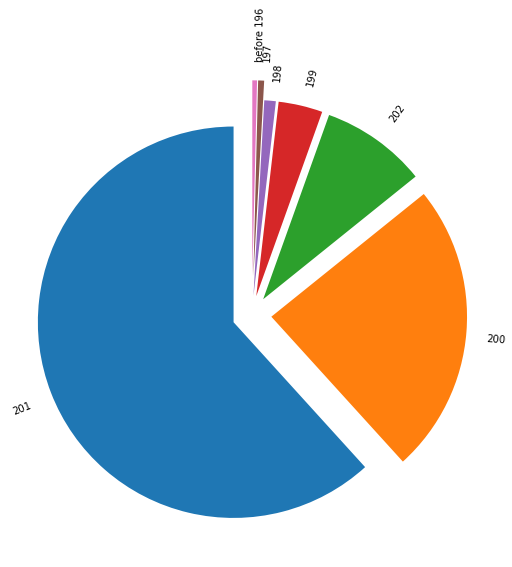

In [18]:
#display the number of asteroids discovered across the decades
fig, ax = plt.subplots(figsize =(14, 9))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2)
ax.pie(proportions, explode = explode, labels = proportions.index, rotatelabels = True, startangle = 90)

Text(0.5, 0.98, 'Min and Max diameter per class')

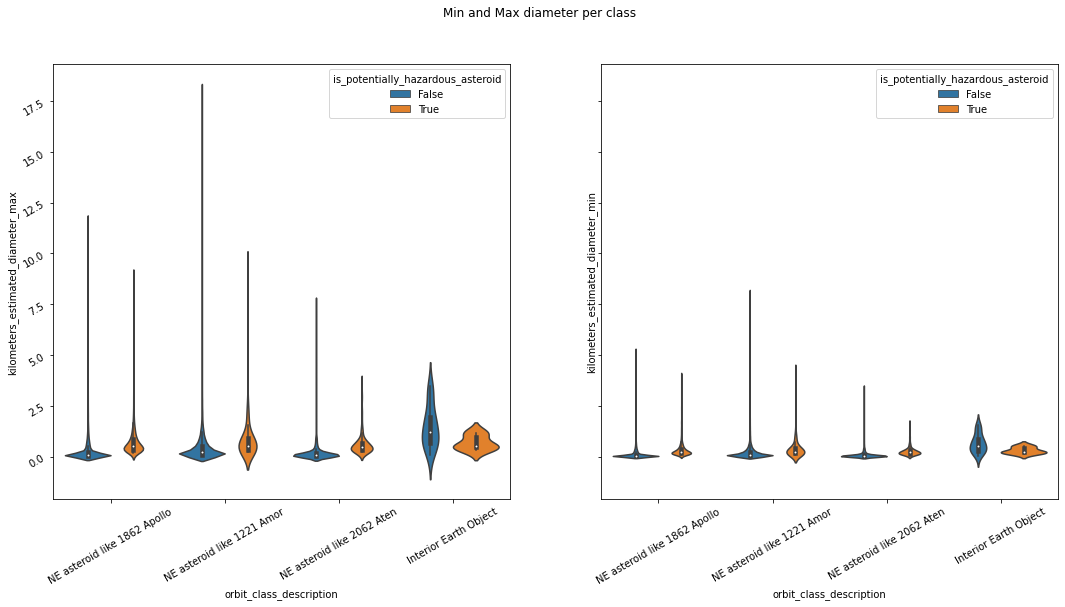

In [19]:
# display the max and min estimated diameter for each class for both hazardous and not hazardous asteroids
fig, (ax0, ax1) = plt.subplots(nrows =1, ncols = 2, sharey = True, figsize = (18,8))
sns.violinplot(data = asteroids_df, x = 'orbit_class_description', y = 'kilometers_estimated_diameter_max', 
            ax = ax0, hue = 'is_potentially_hazardous_asteroid')
sns.violinplot(data = asteroids_df, x = 'orbit_class_description', y = 'kilometers_estimated_diameter_min', 
            ax = ax1, hue = 'is_potentially_hazardous_asteroid')
ax0.tick_params(labelrotation=30)
ax1.tick_params(labelrotation=30)
fig.suptitle('Min and Max diameter per class')

Text(0.5, 0.98, 'Perihelion and aphelion distance per class')

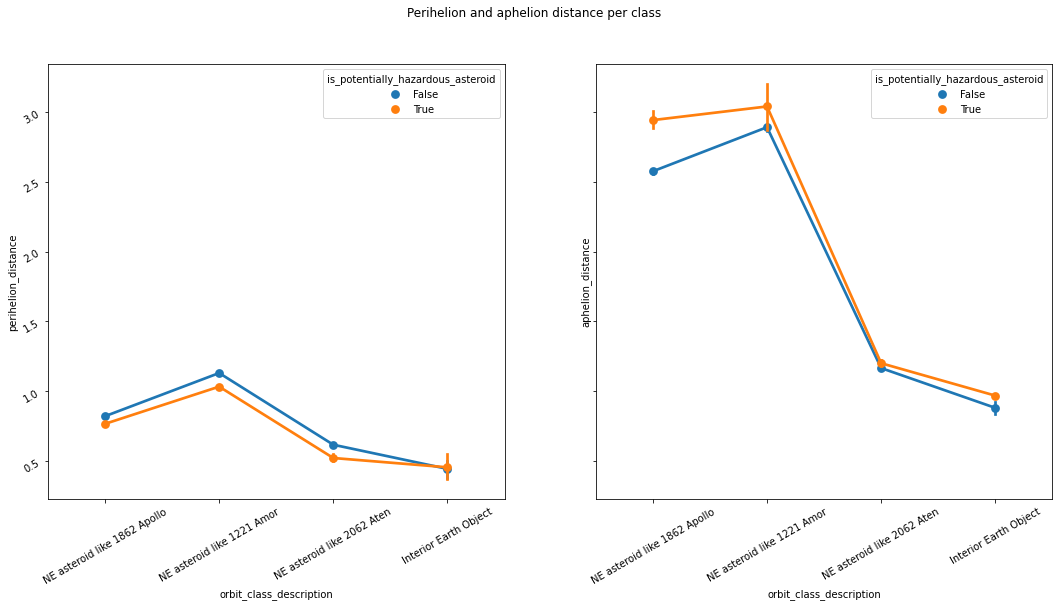

In [20]:
# display the perihelion and aphelion distance per class for both hazardous and not hazardous asteroids
fig, (ax0, ax1) = plt.subplots(nrows =1, ncols = 2, sharey = True, figsize = (18,8))
sns.pointplot(data = asteroids_df, x = 'orbit_class_description', y = 'perihelion_distance', 
            ax = ax0, hue = 'is_potentially_hazardous_asteroid')
sns.pointplot(data = asteroids_df, x = 'orbit_class_description', y = 'aphelion_distance', 
            ax = ax1, hue = 'is_potentially_hazardous_asteroid')
ax0.tick_params(labelrotation=30)
ax1.tick_params(labelrotation=30)
fig.suptitle('Perihelion and aphelion distance per class')

<AxesSubplot:>

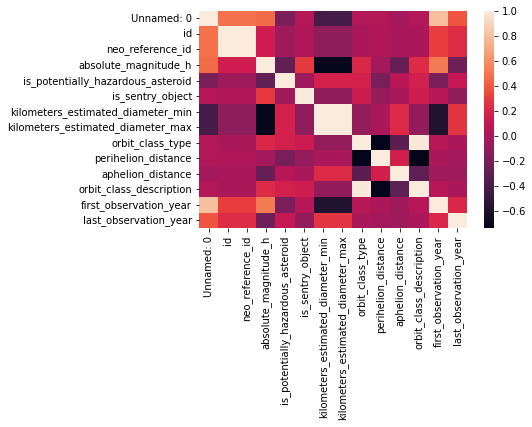

In [21]:
# identify the correlation between the columns and display it

sns.heatmap(asteroids.corr())

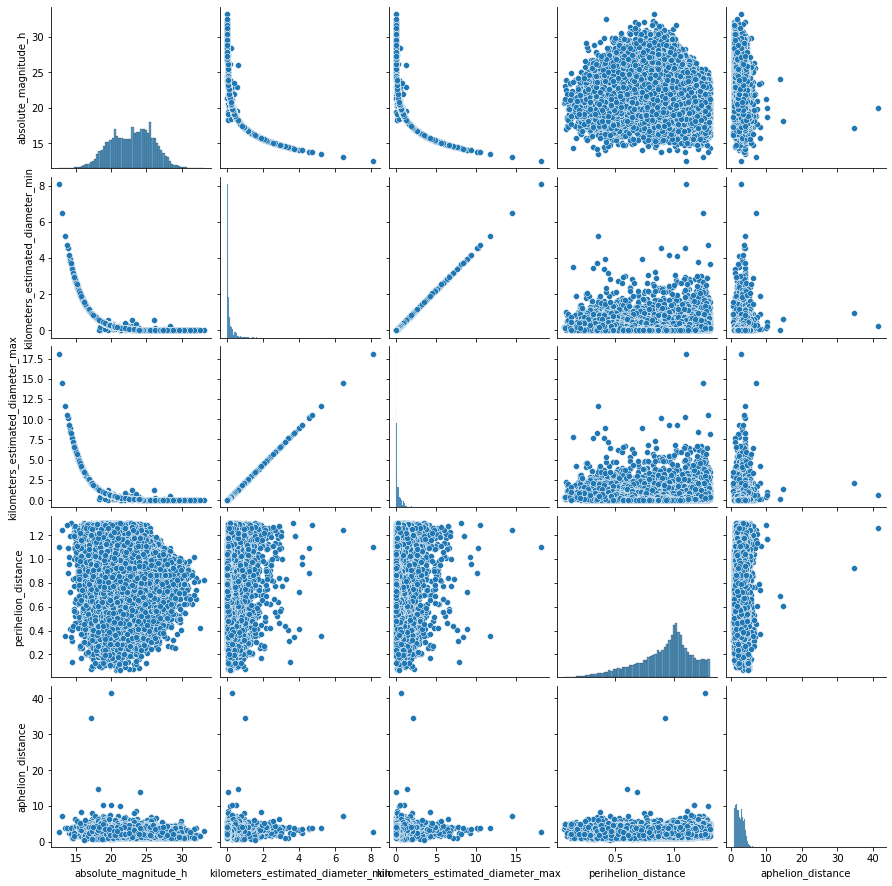

In [22]:
sns.pairplot(asteroids[numeric])

In [23]:
# import the necesary libraries to perform the hazardous/ not hazardous classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
# define the features and labels

X = asteroids.drop(['Unnamed: 0','is_potentially_hazardous_asteroid', 'id', 'neo_reference_id', 'name', 'designation', 
                    'first_observation_date','last_observation_date', 'first_observation_year', 'orbit_id',
                    'last_observation_year', 'decade'], axis = 1)
y = asteroids['is_potentially_hazardous_asteroid']


In [25]:
#Scaling features in the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


array([[-2.61558052, -0.21564673,  7.62510963, ..., -1.26492423,
         0.28547586,  0.49547042],
       [-2.36156176, -0.21564673,  5.23094194, ...,  1.39243089,
         1.28915564, -1.16665234],
       [-2.229472  , -0.21564673,  4.27686165, ...,  0.58219065,
         0.7769811 , -1.16665234],
       ...,
       [ 1.44194583, -0.21564673, -0.53963519, ..., -0.5436722 ,
         0.21351073,  0.49547042],
       [ 1.48597575, -0.21564673, -0.5415492 , ...,  0.5594549 ,
         1.39953115, -1.16665234],
       [ 1.98723944, -0.21564673, -0.55688026, ...,  0.05506144,
        -0.37034705,  0.49547042]])

In [26]:
#Split the data into training set and testing set using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=15)

In [27]:
#Train and fit a logistic regression model on the training set

log_reg = LogisticRegression(random_state = 15)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=15)

In [28]:
# predict values for the testing data

y_pred = log_reg.predict(X_test)

In [29]:
#Create a classification report and confusion matrix for the model

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(log_reg.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6557
           1       0.34      0.05      0.09       640

    accuracy                           0.91      7197
   macro avg       0.63      0.52      0.52      7197
weighted avg       0.86      0.91      0.87      7197

[[6488   69]
 [ 605   35]]
0.9063498680005558


In [30]:
# hazardous/ not hazardous classification with decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
# Use GridSearchCV with multiple parameters and fit the model

dt = DecisionTreeClassifier(random_state = 15)

params_dt = {'max_depth':[1, 2, 3, 4, 5], 'min_samples_leaf': [0.08, 0.1], 'max_features' :[0.2, 0.4, 0.6, 0.8]}
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, scoring = 'accuracy', cv =10, n_jobs= -1)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=15),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.08, 0.1]},
             scoring='accuracy')

In [32]:
# identify the best model and calculate the scores

best_hyperparams = grid_dt.best_params_
best_model = grid_dt.best_estimator_
dt_pred = best_model.predict(X_test)
test_acc = best_model.score(X_test, y_test)

print(best_model)
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(test_acc)

DecisionTreeClassifier(max_depth=1, max_features=0.2, min_samples_leaf=0.08,
                       random_state=15)
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6557
           1       0.00      0.00      0.00       640

    accuracy                           0.91      7197
   macro avg       0.46      0.50      0.48      7197
weighted avg       0.83      0.91      0.87      7197

[[6557    0]
 [ 640    0]]
0.9110740586355426


In [33]:
# hazardous/ not hazardous classification with random forest

from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(n_estimators = 300, max_depth=4, max_features=0.6, min_samples_leaf=0.04,
                       random_state=15)
rf.fit(X_test, y_test)

RandomForestClassifier(max_depth=4, max_features=0.6, min_samples_leaf=0.04,
                       n_estimators=300, random_state=15)

In [35]:
# predict values for the testing data

rf_pred = rf.predict(X_test)

In [36]:
#Create a classification report and confusion matrix for the model

print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(rf.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6557
           1       0.00      0.00      0.00       640

    accuracy                           0.91      7197
   macro avg       0.46      0.50      0.48      7197
weighted avg       0.83      0.91      0.87      7197

[[6557    0]
 [ 640    0]]
0.9110740586355426


In [39]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
# predict the results

gnb_pred = gnb.predict(X_test)

In [44]:
#Create a classification report and confusion matrix for the model

print('Classification Report\n\n', classification_report(y_test, gnb_pred))
print('Confusion matrix\n\n', confusion_matrix(y_test, gnb_pred))
print('\nAccuracy\n\n', gnb.score(X_test,y_test))

Classification Report

               precision    recall  f1-score   support

           0       0.97      0.87      0.92      6557
           1       0.37      0.75      0.49       640

    accuracy                           0.86      7197
   macro avg       0.67      0.81      0.71      7197
weighted avg       0.92      0.86      0.88      7197

Confusion matrix

 [[5737  820]
 [ 162  478]]

Accuracy

 0.8635542587189107


Text(0.5, 1.0, 'Gaussian Naive Bayes ROC Curve')

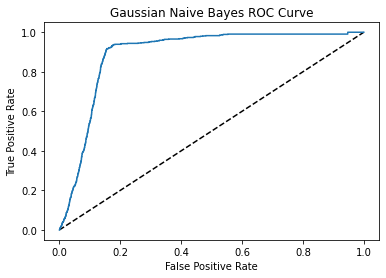

In [45]:
#plot ROC curve

from sklearn.metrics import roc_curve
gnb_pred_prob = gnb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, gnb_pred_prob) ;
plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes ROC Curve')



In [46]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, gnb_pred_prob)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8908
